In [55]:
#Importing libraries

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load clinical-study.csv
clinical_data = pd.read_csv("clinical-study.csv")

# Load protein-levels.csv
protein_data = pd.read_csv("protein-levels.csv")

In [3]:
#show first 5 rows
clinical_data.head()

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y


In [4]:
protein_data.head()

,participant_id,protein_concentration
0,SUBJ_001,148.0
1,SUBJ_002,85.0
2,SUBJ_003,183.0
3,SUBJ_004,89.0
4,SUBJ_005,137.0


In [5]:
##checking information about dataframe
clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subject_id  772 non-null    object 
 1   age         772 non-null    float64
 2   sex         772 non-null    object 
 3   weight      761 non-null    float64
 4   height      772 non-null    float64
 5   trt_grp     772 non-null    object 
 6   RESPONSE    772 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.3+ KB


In [6]:
#checking all columns
clinical_data.columns

Index(['subject_id', 'age', 'sex', 'weight', 'height', 'trt_grp', 'RESPONSE'], dtype='object')

In [7]:
#statistical description of the numeric values
clinical_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,772.0,61.580782,7.866491,7.200,57.00,62.00,67.00,79.00
weight,761.0,91.110074,22.489547,22.310,75.55,88.87,104.65,182.50
height,772.0,1.677462,0.101405,1.193,1.60,1.67,1.76,1.94


#### Visualisation of data before cleaning

In [8]:
# Generate profile report for clinical data before cleaning

clinical_profile = pandas_profiling.ProfileReport(clinical_data)
#clinical_profile.to_file("clinical_profile.html")

# Generate profile report for protein data
protein_profile = pandas_profiling.ProfileReport(protein_data)
#protein_profile.to_file("protein_profile.html")

In [9]:
clinical_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Data cleaning

In [10]:
# Checking for missing values 
clinical_data.isnull().sum()

subject_id     0
age            0
sex            0
weight        11
height         0
trt_grp        0
RESPONSE       0
dtype: int64

In [11]:
# Find rows with missing values
rows_with_missing_values = clinical_data[clinical_data.isnull().any(axis=1)]

# Display rows with missing values
print("Rows with Missing Values:")
rows_with_missing_values

Rows with Missing Values:


,subject_id,age,sex,weight,height,trt_grp,RESPONSE
10,SUBJ_010,73.0,Female,NaN,1.64,DRUG,Y
50,SUBJ_050,65.0,Male,NaN,1.71,DRUG,N
61,SUBJ_061,61.0,Male,NaN,1.79,CONTROL,N
82,SUBJ_082,65.0,Male,NaN,1.78,CONTROL,N
146,SUBJ_146,56.0,Female,NaN,1.57,CONTROL,N
372,SUBJ_372,67.0,Female,NaN,1.62,CONTROL,N
427,SUBJ_427,66.0,Male,NaN,1.83,CONTROL,N
495,SUBJ_495,60.0,Female,NaN,1.65,CONTROL,N
523,SUBJ_523,62.0,Female,NaN,1.60,DRUG,N
685,SUBJ_685,74.0,Male,NaN,1.81,CONTROL,N


In [12]:
# Fill missing values with the mean of the column to ensure equal distribution
clinical_data['weight'].fillna(clinical_data['weight'].mean(), inplace=True)

In [13]:
# Confirming for missing values 
clinical_data.isnull().sum()

subject_id    0
age           0
sex           0
weight        0
height        0
trt_grp       0
RESPONSE      0
dtype: int64

In [14]:
# Find duplicate rows
clinical_data[clinical_data.duplicated(subset=clinical_data.columns[1:], keep=False)]

,subject_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
1,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N


In [15]:
# Remove duplicate rows leaving one of the rows
clinical_data.drop_duplicates(subset=clinical_data.columns[1:], keep='first', inplace=True)

In [16]:
#confirming its been removed
clinical_data[clinical_data.duplicated(subset=clinical_data.columns[1:], keep=False)]

,subject_id,age,sex,weight,height,trt_grp,RESPONSE


In [17]:
# Find rows where age is less than 18
pediatric_rows = clinical_data[clinical_data['age'] < 18]

# Display pediatric rows
print("Pediatric Rows:")
pediatric_rows

Pediatric Rows:


,subject_id,age,sex,weight,height,trt_grp,RESPONSE
769,SUBJ_A69,7.200,Female,22.310,1.19300,DRUG,N
770,SUBJ_A70,8.310,Female,24.220,1.27440,CONTROL,N
771,SUBJ_A71,7.854,Male,23.176,1.26343,CONTROL,N


In [18]:
# replace main df with only age greater than/equal 18
clinical_data = clinical_data[clinical_data['age'] >= 18]

# Verify the removal of pediatric rows
print("Updated Clinical Data:")
clinical_data

Updated Clinical Data:


,subject_id,age,sex,weight,height,trt_grp,RESPONSE
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y
5,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,N
...,...,...,...,...,...,...,...
764,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,Y
765,SUBJ_765,65.0,Male,112.86,1.76,DRUG,N
766,SUBJ_766,60.0,Male,81.03,1.77,DRUG,N
767,SUBJ_767,53.0,Male,88.67,1.72,DRUG,Y


In [19]:
clinical_data['age'].min()

37.0

### Creating new variables for computation

In [20]:
# Calculate BMI and add a new column for computation(BMI is calculated by dividing weight by the square of height)
clinical_data['BMI'] = clinical_data['weight'] / (clinical_data['height'] ** 2)

# Display the updated clinical data
print("Updated Clinical Data with BMI:")
clinical_data


Updated Clinical Data with BMI:


,subject_id,age,sex,weight,height,trt_grp,RESPONSE,BMI
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,33.487599
2,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,26.476056
3,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,23.338568
4,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,27.973333
5,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,N,42.873273
...,...,...,...,...,...,...,...,...
764,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,Y,32.811202
765,SUBJ_765,65.0,Male,112.86,1.76,DRUG,N,36.434659
766,SUBJ_766,60.0,Male,81.03,1.77,DRUG,N,25.864215
767,SUBJ_767,53.0,Male,88.67,1.72,DRUG,Y,29.972282


In [21]:
#to merge both datasets, we have to rename the subject_id for both to be one
# Rename patient ID columns to have the same name then merge
clinical_data.rename(columns={'subject_id': 'Patient_ID'}, inplace=True)
protein_data.rename(columns={'participant_id': 'Patient_ID'}, inplace=True)

# Merge the clinical data and protein data
merged_data = pd.merge(clinical_data, protein_data, on='Patient_ID')

# Display the first five rows of the merged data
print("Merged Data:")
merged_data.head()

Merged Data:


,Patient_ID,age,sex,weight,height,trt_grp,RESPONSE,BMI,protein_concentration
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,N,33.487599,148.0
1,SUBJ_002,47.0,Female,71.21,1.64,DRUG,Y,26.476056,85.0
2,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,N,23.338568,183.0
3,SUBJ_004,59.0,Female,62.94,1.50,DRUG,Y,27.973333,89.0
4,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,N,42.873273,137.0


### Data computation and aggregation

#### Comparing the mean age in two treatment groups

In [22]:
# Compare mean age in the two treatment groups of drug and control
mean_age_by_group = merged_data.groupby('trt_grp')['age'].mean()

print("Mean Age by Treatment Group:")
mean_age_by_group

Mean Age by Treatment Group:


trt_grp
CONTROL    61.862338
DRUG       61.759791
Name: age, dtype: float64

#### Comparing the mean age in responders vs non-responders

In [23]:
# Compare mean age in responders vs non-responders
mean_age_by_response = merged_data.groupby('RESPONSE')['age'].mean()

print("Mean Age by Response:")
mean_age_by_response

Mean Age by Response:


RESPONSE
N    61.748848
Y    61.892216
Name: age, dtype: float64

#### Comparing responders and non-responders in the two treatment groups

In [24]:
# Compare responders and non-responders in the two treatment groups by count of each group
# The resulting output will show the count of responders and non-responders in each treatment group.
grouped_data = merged_data.groupby(['trt_grp', 'RESPONSE']).size()

print("Comparison of Responders and Non-responders by Treatment Group:")
grouped_data

Comparison of Responders and Non-responders by Treatment Group:


trt_grp  RESPONSE
CONTROL  N           261
         Y           124
DRUG     N           173
         Y           210
dtype: int64

In [25]:
# Create a pivot table to display the comparison, where N is non-responder and Y is responder
pivot_table = merged_data.pivot_table(index='trt_grp', columns='RESPONSE', aggfunc='size', fill_value=0)

# Rename the columns for better readability
pivot_table.columns = ['N', 'Y']

print("Comparison of Responders and Non-responders by Treatment Group:")
pivot_table


Comparison of Responders and Non-responders by Treatment Group:


,N,Y
trt_grp,,
CONTROL,261,124
DRUG,173,210


#### Comparing the mean weight in responders/non-responders and other variables

In [26]:
# Compare mean weight in responders vs non-responders
mean_weight_by_response = merged_data.groupby('RESPONSE')['weight'].mean()

print("Mean Weight by Response:")
mean_weight_by_response

Mean Weight by Response:


RESPONSE
N    89.947790
Y    93.249312
Name: weight, dtype: float64

In [27]:
# Compare mean weight in responders vs non-responders across both treatment groups
mean_weight_by_group = merged_data.groupby(['trt_grp', 'RESPONSE'])['weight'].mean().reset_index()

# Create a pivot table to display the comparison
pivot_weight_table = mean_weight_by_group.pivot_table(index='trt_grp', columns='RESPONSE', values='weight')

print("Mean Weight by Treatment Group and Response:")
pivot_weight_table

Mean Weight by Treatment Group and Response:


RESPONSE,N,Y
trt_grp,,
CONTROL,89.797358,96.397742
DRUG,90.174741,91.390239


#### Comparing the protein concentration in responders vs non responders

In [28]:
#checking to see the minimum, maximum and average values of the protein concentration to compare mean response by
merged_data['protein_concentration'].min()

44.0

In [29]:
merged_data['protein_concentration'].max()

199.0

In [30]:
merged_data['protein_concentration'].mean()

121.6867627785059

In [31]:
# Compare protein concentration in responders vs non-responders
mean_protein_by_response = merged_data.groupby('RESPONSE')['protein_concentration'].mean()

print("Mean Protein Concentration by Response:")
mean_protein_by_response

Mean Protein Concentration by Response:


RESPONSE
N    134.976798
Y    104.433735
Name: protein_concentration, dtype: float64

## Visualisation after data cleaning and computation

### Response Rates by Treatment Group: 
##### To compare the response rates between the GSK drug group and control group, we'll filter the clinical data based on the treatment groups and calculate the response rates for each group.

#### Boxplot of age(y-axis) by response (x-axis)

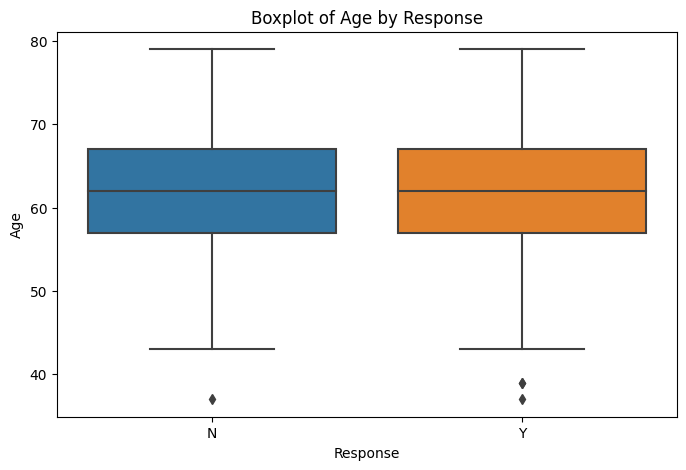

In [32]:
#boxplot of age by response

plt.figure(figsize=(8, 5))
sns.boxplot(x='RESPONSE', y='age', data=merged_data)
plt.xlabel('Response')
plt.ylabel('Age')
plt.title('Boxplot of Age by Response')
#plt.savefig('./age_response_plot1.png')
plt.show()

In [33]:
#((merged_data['RESPONSE']=='N')&(merged_data['age']<=70)).value_counts()

#### Boxplot of age and response, separated by the treatment group

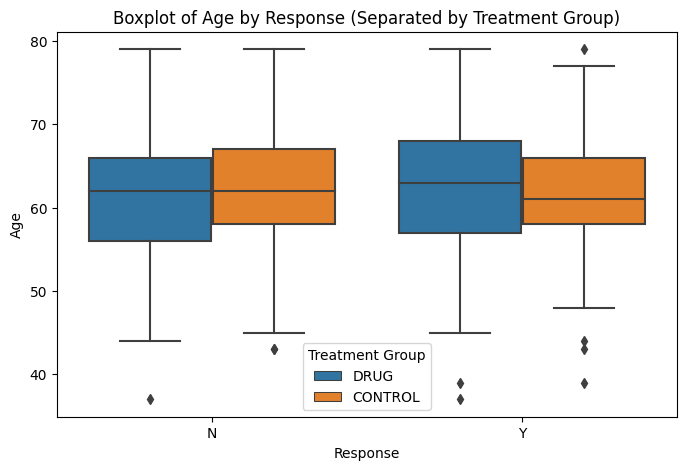

In [34]:
# Create a boxplot of age by response, separated by treatment group
plt.figure(figsize=(8, 5))
sns.boxplot(x='RESPONSE', y='age', hue='trt_grp', data=merged_data)
plt.xlabel('Response')
plt.ylabel('Age')
plt.title('Boxplot of Age by Response (Separated by Treatment Group)')
plt.legend(title='Treatment Group')
#plt.savefig('./age_trtgrp_plot2.png')
plt.show()

#### Boxplot of weight/BMI(y-axis) by response (x-axis)

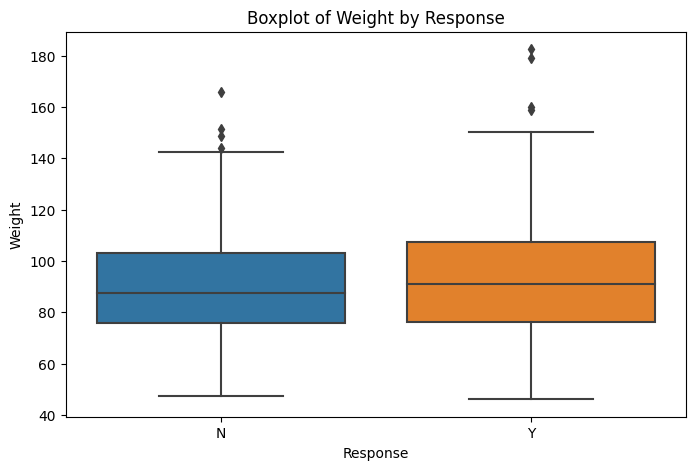

In [35]:
# Create a boxplot of weight by response
plt.figure(figsize=(8, 5))
sns.boxplot(x='RESPONSE', y='weight', data=merged_data)
plt.xlabel('Response')
plt.ylabel('Weight')
plt.title('Boxplot of Weight by Response')
#plt.savefig('./weight_response_plot3.png')
plt.show()

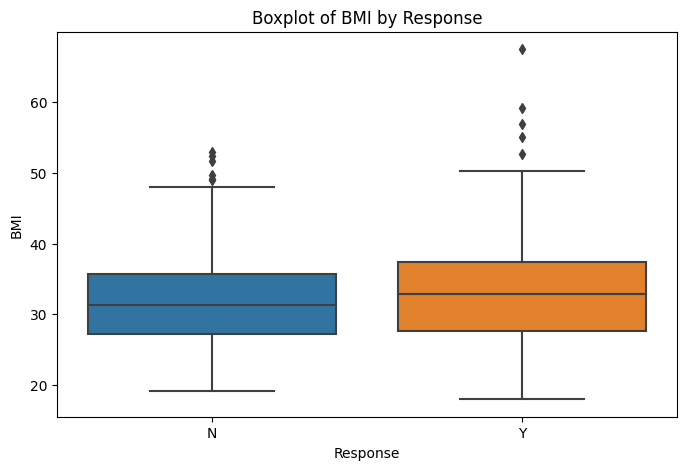

In [36]:
# Create a boxplot of BMI by response
plt.figure(figsize=(8, 5))
sns.boxplot(x='RESPONSE', y='BMI', data=merged_data)
plt.xlabel('Response')
plt.ylabel('BMI')
plt.title('Boxplot of BMI by Response')
#plt.savefig('./bmi_response_plot4.png')
plt.show()

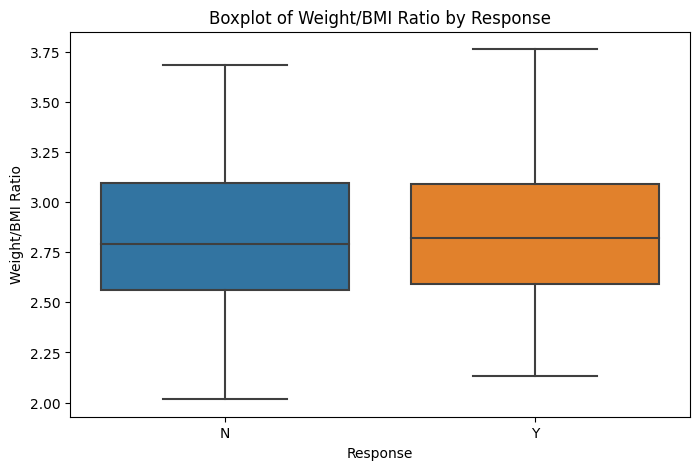

In [37]:
#to plot the weight by BMI ratio against response in one plot

# Calculate weight divided by BMI
merged_data['weight_bmi_ratio'] = merged_data['weight'] / merged_data['BMI']

# Create a boxplot of weight/BMI ratio by response
plt.figure(figsize=(8, 5))
sns.boxplot(x='RESPONSE', y='weight_bmi_ratio', data=merged_data)
plt.xlabel('Response')
plt.ylabel('Weight/BMI Ratio')
plt.title('Boxplot of Weight/BMI Ratio by Response')
#plt.savefig('./weightbmi_response_plot5.png')
plt.show()


#### Boxplot of weight/BMI ratio by response, separated by treatment group

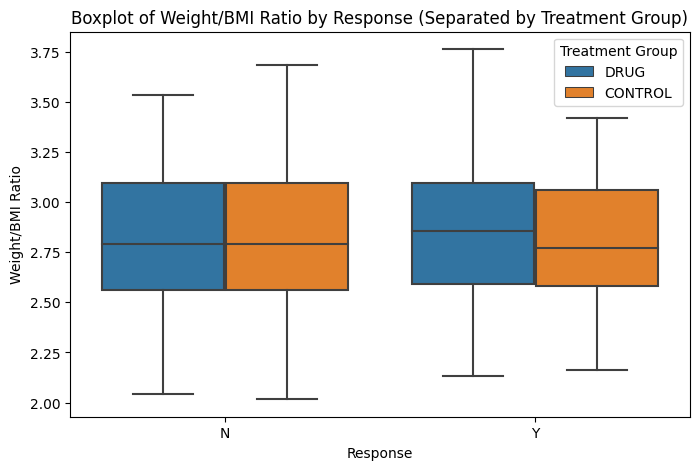

In [38]:
# Create a boxplot of weight/BMI ratio by response, separated by treatment group
plt.figure(figsize=(8, 5))
sns.boxplot(x='RESPONSE', y='weight_bmi_ratio', hue='trt_grp', data=merged_data)
plt.xlabel('Response')
plt.ylabel('Weight/BMI Ratio')
plt.title('Boxplot of Weight/BMI Ratio by Response (Separated by Treatment Group)')
plt.legend(title='Treatment Group')
#plt.savefig('./weightbmi_trtgrp_plot6.png')
plt.show()


#### Boxplot of protein_concentration (y-axis) by response (x-axis)

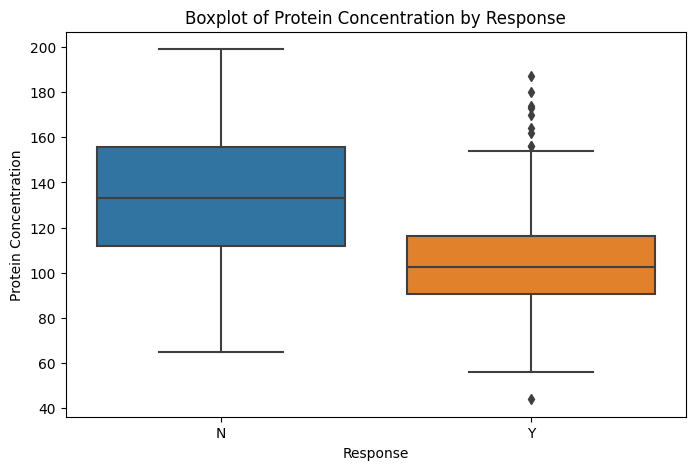

In [39]:
# Creating a boxplot of protein concentration by response
plt.figure(figsize=(8, 5))
sns.boxplot(x='RESPONSE', y='protein_concentration', data=merged_data)
plt.xlabel('Response')
plt.ylabel('Protein Concentration')
plt.title('Boxplot of Protein Concentration by Response')
#plt.savefig('./protein_response_plot7.png')
plt.show()

#### Boxplot of protein_concentration (y-axis) by response (x-axis) and separated by treatment group

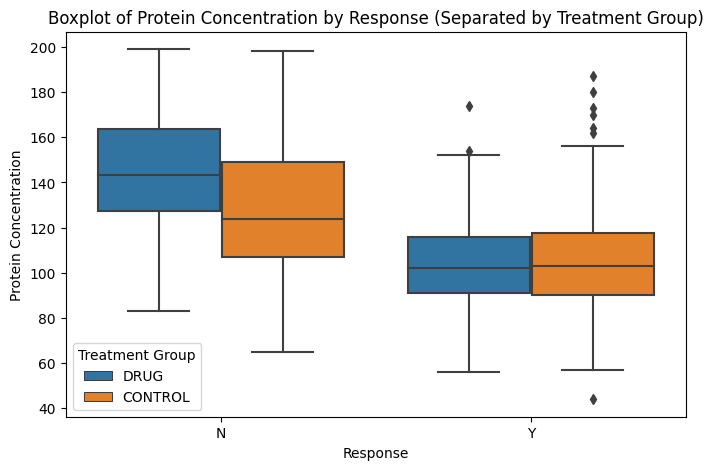

In [40]:
# Creating a boxplot of protein concentration by response, separated by treatment group
plt.figure(figsize=(8, 5))
sns.boxplot(x='RESPONSE', y='protein_concentration', hue='trt_grp', data=merged_data)
plt.xlabel('Response')
plt.ylabel('Protein Concentration')
plt.title('Boxplot of Protein Concentration by Response (Separated by Treatment Group)')
plt.legend(title='Treatment Group')
#plt.savefig('./protein_trtgrp_plot8.png')
plt.show()

In [43]:
# Specify the directory to save the figures
output_dir = './fig/'

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

#empty dictionary to save plots in
CT_plots_figs = {}

age_response_plot1 = sns.boxplot(x='RESPONSE', y='age', data=merged_data)
age_trtgrp_plot2 = sns.boxplot(x='RESPONSE', y='age', hue='trt_grp', data=merged_data)
weight_response_plot3 = sns.boxplot(x='RESPONSE', y='weight', data=merged_data)
bmi_response_plot4 = sns.boxplot(x='RESPONSE', y='BMI', data=merged_data)
weightbmi_response_plot5 = sns.boxplot(x='RESPONSE', y='weight_bmi_ratio', data=merged_data)
weightbmi_trtgrp_plot6 = sns.boxplot(x='RESPONSE', y='weight_bmi_ratio', hue='trt_grp', data=merged_data)
protein_response_plot7 = sns.boxplot(x='RESPONSE', y='protein_concentration', data=merged_data)
protein_trtgrp_plot8 = sns.boxplot(x='RESPONSE', y='protein_concentration', hue='trt_grp', data=merged_data)

#./fig is the default directory and folder created to save my plots
CT_plots_figs["./age_response_plot1.png"] = age_response_plot1 
CT_plots_figs["./age_trtgrp_plot2.png"] = age_trtgrp_plot2
CT_plots_figs["./weight_response_plot3.png"] = weight_response_plot3
CT_plots_figs['./bmi_response_plot4.png'] = bmi_response_plot4
CT_plots_figs['./weightbmi_response_plot5.png'] = weightbmi_response_plot5
CT_plots_figs['./weightbmi_trtgrp_plot6.png'] = weightbmi_trtgrp_plot6
CT_plots_figs['./protein_response_plot7.png'] = protein_response_plot7
CT_plots_figs['./protein_trtgrp_plot8.png'] = protein_trtgrp_plot8

# Loop through the dictionary and save the figures
for filename, plot in CT_plots_figs.items():
    filepath = os.path.join(output_dir, filename)
    plot.figure.savefig(filepath)

# Optional: Close the figures to free up memory
plt.close('all')

### Modelling

In [44]:
#we want to build a model using the merged dataset, lets view the details
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             768 non-null    object 
 1   age                    768 non-null    float64
 2   sex                    768 non-null    object 
 3   weight                 768 non-null    float64
 4   height                 768 non-null    float64
 5   trt_grp                768 non-null    object 
 6   RESPONSE               768 non-null    object 
 7   BMI                    768 non-null    float64
 8   protein_concentration  763 non-null    float64
 9   weight_bmi_ratio       768 non-null    float64
dtypes: float64(6), object(4)
memory usage: 66.0+ KB


In [45]:
#the info shows missing values in the protein_conc column
merged_data.isna().sum()

Patient_ID               0
age                      0
sex                      0
weight                   0
height                   0
trt_grp                  0
RESPONSE                 0
BMI                      0
protein_concentration    5
weight_bmi_ratio         0
dtype: int64

In [46]:
# Find rows with missing values
missing_protein_values = merged_data[merged_data.isnull().any(axis=1)]

# Display rows with missing values
print("missing_protein_values:")
missing_protein_values

missing_protein_values:


,Patient_ID,age,sex,weight,height,trt_grp,RESPONSE,BMI,protein_concentration,weight_bmi_ratio
75,SUBJ_076,78.0,Male,78.92,1.79,DRUG,N,24.630942,NaN,3.2041
182,SUBJ_183,56.0,Male,91.92,1.83,DRUG,N,27.447819,NaN,3.3489
342,SUBJ_343,70.0,Male,92.01,1.70,DRUG,N,31.837370,NaN,2.8900
349,SUBJ_350,51.0,Male,118.81,1.71,DRUG,Y,40.631305,NaN,2.9241
502,SUBJ_503,66.0,Female,91.89,1.53,CONTROL,Y,39.254133,NaN,2.3409


In [47]:
#fill the missing values with average of the protein_conc column to ensure equal distribution
merged_data['protein_concentration'].fillna(merged_data['protein_concentration'].mean(), inplace=True)

In [48]:
#checking for completeness
merged_data.isna().sum()

Patient_ID               0
age                      0
sex                      0
weight                   0
height                   0
trt_grp                  0
RESPONSE                 0
BMI                      0
protein_concentration    0
weight_bmi_ratio         0
dtype: int64

#### we use Logistic regression to build a model

In [49]:
#importing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create a copy of the DataFrame
merged_data_encoded = merged_data.copy()

# Encode the target variable
label_encoder = LabelEncoder()
merged_data_encoded['RESPONSE'] = label_encoder.fit_transform(merged_data['RESPONSE'])
merged_data_encoded

,Patient_ID,age,sex,weight,height,trt_grp,RESPONSE,BMI,protein_concentration,weight_bmi_ratio
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,0,33.487599,148.0,2.5281
1,SUBJ_002,47.0,Female,71.21,1.64,DRUG,1,26.476056,85.0,2.6896
2,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,0,23.338568,183.0,2.9929
3,SUBJ_004,59.0,Female,62.94,1.50,DRUG,1,27.973333,89.0,2.2500
4,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,0,42.873273,137.0,2.6569
...,...,...,...,...,...,...,...,...,...,...
763,SUBJ_764,61.0,Female,82.95,1.59,CONTROL,1,32.811202,101.0,2.5281
764,SUBJ_765,65.0,Male,112.86,1.76,DRUG,0,36.434659,122.0,3.0976
765,SUBJ_766,60.0,Male,81.03,1.77,DRUG,0,25.864215,121.0,3.1329
766,SUBJ_767,53.0,Male,88.67,1.72,DRUG,1,29.972282,126.0,2.9584


#### Model for patients on Miraculon-B 'Drug'

In [74]:
merged_data_encoded_drug = merged_data_encoded[(merged_data_encoded['trt_grp'] == 'DRUG')]
merged_data_encoded_drug

,Patient_ID,age,sex,weight,height,trt_grp,RESPONSE,BMI,protein_concentration,weight_bmi_ratio
0,SUBJ_001,46.0,Female,84.66,1.59,DRUG,0,33.487599,148.0,2.5281
1,SUBJ_002,47.0,Female,71.21,1.64,DRUG,1,26.476056,85.0,2.6896
3,SUBJ_004,59.0,Female,62.94,1.50,DRUG,1,27.973333,89.0,2.2500
7,SUBJ_008,57.0,Male,93.50,1.63,DRUG,0,35.191388,115.0,2.6569
8,SUBJ_009,72.0,Male,85.57,1.68,DRUG,0,30.318169,197.0,2.8224
...,...,...,...,...,...,...,...,...,...,...
762,SUBJ_763,70.0,Female,62.21,1.66,DRUG,1,22.575846,89.0,2.7556
764,SUBJ_765,65.0,Male,112.86,1.76,DRUG,0,36.434659,122.0,3.0976
765,SUBJ_766,60.0,Male,81.03,1.77,DRUG,0,25.864215,121.0,3.1329
766,SUBJ_767,53.0,Male,88.67,1.72,DRUG,1,29.972282,126.0,2.9584


In [75]:
#use correlation to see highly correlating variables for model
merged_data_encoded_drug.corr()

,age,weight,height,RESPONSE,BMI,protein_concentration,weight_bmi_ratio
age,1.000000,0.011720,0.049915,0.054468,0.004780,-0.003451,0.049397
weight,0.011720,1.000000,0.445118,0.026961,0.879745,0.220916,0.445049
height,0.049915,0.445118,1.000000,0.030000,-0.019621,-0.032631,0.999464
RESPONSE,0.054468,0.026961,0.030000,1.000000,0.018714,-0.662185,0.029072
BMI,0.004780,0.879745,-0.019621,0.018714,1.000000,0.253056,-0.020311
protein_concentration,-0.003451,0.220916,-0.032631,-0.662185,0.253056,1.000000,-0.032624
weight_bmi_ratio,0.049397,0.445049,0.999464,0.029072,-0.020311,-0.032624,1.000000


<Axes: >

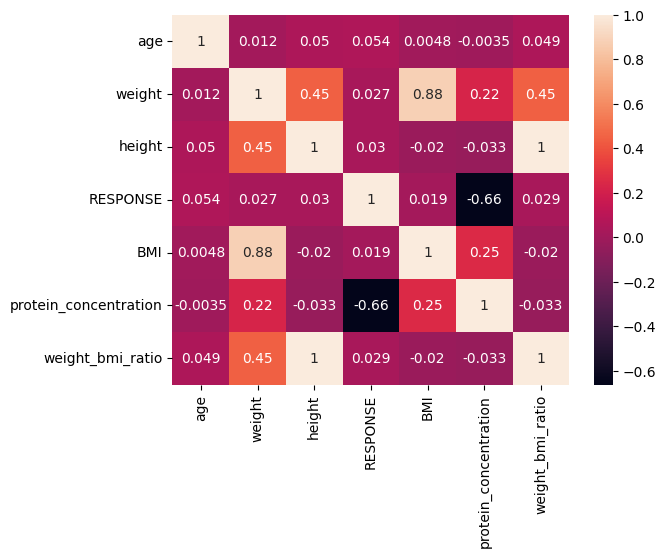

In [76]:
#correlation
plt.figure(dpi=100)
sns.heatmap(merged_data_encoded_drug.corr(), annot = True) # checking for correlation to see if any of the varia

In [92]:
# Select the predictors and target variable
X =merged_data_encoded_drug[['age', 'weight', 'BMI', 'protein_concentration', 'height']]
y =merged_data_encoded_drug['RESPONSE']

In [93]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_scaled, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

Accuracy: 80.52%
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.66      0.77        38
           1       0.74      0.95      0.83        39

    accuracy                           0.81        77
   macro avg       0.83      0.80      0.80        77
weighted avg       0.83      0.81      0.80        77



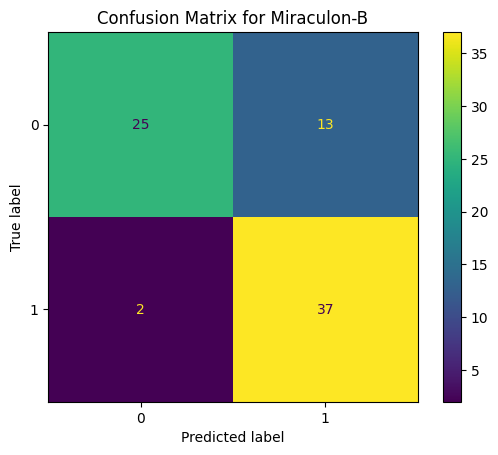

<Figure size 8000x8000 with 0 Axes>

In [94]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model = LogisticRegression()
# Create and train the logistic regression model
def logistic_model(model, title):
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)  # Rename the variable

    print("Accuracy: {:.2f}%".format(accuracy * 100))
    print("Classification Report:\n", classification_rep)  # Use the renamed variable

    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(title)
    plt.show()
    plt.figure(figsize=(40,40), dpi = 200);

logistic_model(model, 'Confusion Matrix for Miraculon-B')

#### Model for patients on standard drug 'Control'

In [81]:
merged_data_encoded_ctrl = merged_data_encoded[(merged_data_encoded['trt_grp'] == 'CONTROL')]
merged_data_encoded_ctrl

,Patient_ID,age,sex,weight,height,trt_grp,RESPONSE,BMI,protein_concentration,weight_bmi_ratio
2,SUBJ_003,48.0,Female,69.85,1.73,CONTROL,0,23.338568,183.0,2.9929
4,SUBJ_005,59.0,Female,113.91,1.63,CONTROL,0,42.873273,137.0,2.6569
5,SUBJ_006,63.0,Male,79.33,1.77,CONTROL,1,25.321587,116.0,3.1329
6,SUBJ_007,77.0,Male,96.12,1.77,CONTROL,0,30.680839,78.0,3.1329
10,SUBJ_011,67.0,Male,109.12,1.71,CONTROL,1,37.317465,110.0,2.9241
...,...,...,...,...,...,...,...,...,...,...
757,SUBJ_758,68.0,Female,84.53,1.53,CONTROL,1,36.110043,123.0,2.3409
758,SUBJ_759,48.0,Female,95.87,1.60,CONTROL,0,37.449219,106.0,2.5600
759,SUBJ_760,66.0,Male,106.50,1.74,CONTROL,0,35.176377,190.0,3.0276
761,SUBJ_762,64.0,Male,137.41,1.77,CONTROL,1,43.860321,170.0,3.1329


In [82]:
#use correlation to see highly correlating variables for model
merged_data_encoded_ctrl.corr()

,age,weight,height,RESPONSE,BMI,protein_concentration,weight_bmi_ratio
age,1.000000,0.047657,0.103182,-0.039400,-0.006804,-0.021884,0.101194
weight,0.047657,1.000000,0.479800,0.143658,0.860546,0.183334,0.479404
height,0.103182,0.479800,1.000000,-0.016434,-0.023029,-0.002837,0.999492
RESPONSE,-0.039400,0.143658,-0.016434,1.000000,0.172064,-0.354622,-0.018765
BMI,-0.006804,0.860546,-0.023029,0.172064,1.000000,0.212767,-0.023902
protein_concentration,-0.021884,0.183334,-0.002837,-0.354622,0.212767,1.000000,-0.001567
weight_bmi_ratio,0.101194,0.479404,0.999492,-0.018765,-0.023902,-0.001567,1.000000


<Axes: >

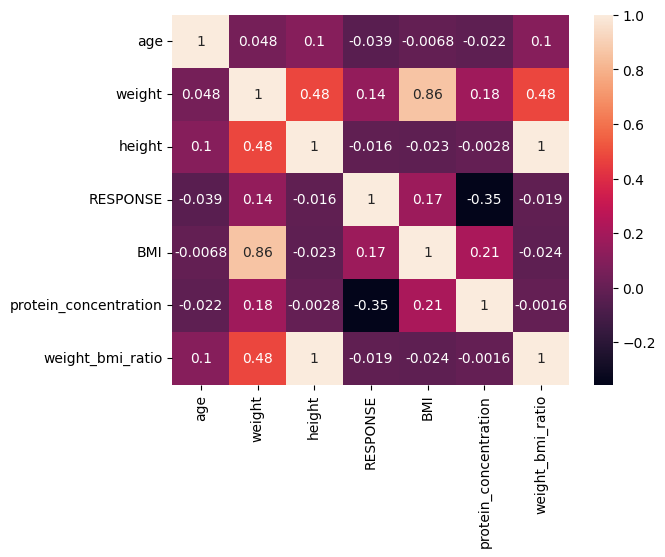

In [83]:
#correlation
plt.figure(dpi=100)
sns.heatmap(merged_data_encoded_ctrl.corr(), annot = True) # checking for correlation to see if any of the varia

In [89]:
# Select the predictors and target variable
X =merged_data_encoded_ctrl[['age', 'weight', 'BMI', 'protein_concentration', 'height']]
y =merged_data_encoded_ctrl['RESPONSE']

In [90]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train = pd.DataFrame(X_scaled, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns)

Accuracy: 79.22%
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        57
           1       0.67      0.40      0.50        20

    accuracy                           0.79        77
   macro avg       0.74      0.66      0.68        77
weighted avg       0.78      0.79      0.77        77



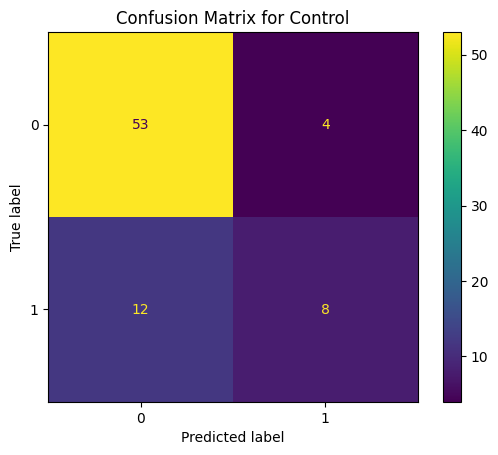

<Figure size 8000x8000 with 0 Axes>

In [91]:
logistic_model(model, 'Confusion Matrix for Control')

#### The classification report provides an evaluation of the model's performance on the test set. Let's break down the key metrics and what they mean:

Accuracy: 72.08%
- Accuracy represents the percentage of correctly predicted labels (both 0 and 1) out of the total number of samples.
- In this case, the model achieved an accuracy of 72.08%, indicating that it correctly predicted the response status (responder or non-responder) for approximately 72.08% of the patients in the test set.

Precision:
- Precision is the ratio of true positive predictions (TP) to the sum of true positive and false positive predictions (TP + FP).
- Precision measures the model's ability to correctly identify positive samples (responders in this case) among all samples predicted as positive.
- For class 0 (non-responders), the precision is 0.83, indicating that out of all the samples predicted as non-responders, 83% were correctly identified.
- For class 1 (responders), the precision is 0.61, indicating that out of all the samples predicted as responders, 61% were correctly identified.

Recall (Sensitivity):
- Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions (TP) to the sum of true positive and false negative predictions (TP + FN).
- Recall measures the model's ability to correctly identify positive samples (responders in this case) among all actual positive samples.
- For class 0 (non-responders), the recall is 0.68, indicating that the model correctly identified 68% of the actual non-responders.
- For class 1 (responders), the recall is 0.78, indicating that the model correctly identified 78% of the actual responders.

F1-score:
- The F1-score is the harmonic mean of precision and recall. It provides a balanced measure that combines both precision and recall into a single metric.
- The F1-score considers both false positives and false negatives and is useful when there is an imbalance between the classes.
- For class 0 (non-responders), the F1-score is 0.75, which takes into account both precision and recall for non-responders.
- For class 1 (responders), the F1-score is 0.69, which takes into account both precision and recall for responders.

Support:
- Support represents the number of samples in each class (0 and 1) in the test set.
- In this case, there are 94 samples of class 0 (non-responders) and 60 samples of class 1 (responders) in the test set.

Macro Avg and Weighted Avg:
- Macro average calculates the metrics (precision, recall, F1-score) independently for each class and then takes the average.
- Weighted average calculates the metrics weighted by the support (number of samples) for each class.
- In this case, the macro average of precision, recall, and F1-score is approximately 0.72, indicating a balanced performance across both classes.
- The weighted average takes into account the class imbalance and is slightly higher than the macro average, indicating better performance on the larger class (non-responders).

Overall, the model achieved a decent accuracy of 72.08% and showed relatively balanced precision, recall, and F1-score for both responders and non-responders. However, further analysis and fine-tuning of the model may be required to improve its performance, depending on the specific requirements and goals of the analysis.